# Pb concentration plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from mpl_toolkits.basemap import Basemap, cm
import netCDF4 as nc
import cmocean
import glob
import pandas as pd 
import warnings
import numpy.ma as ma
from oceans import sw_extras as swe
import matplotlib.gridspec as gridspec

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
Pb_data = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Pb-paper-data.csv')

In [3]:
dPb_BB1 = Pb_data['BB1'][np.isfinite(Pb_data['BB1'])].astype('float')
dPb_BB2 = Pb_data['BB2'][np.isfinite(Pb_data['BB2'])].astype('float')
dPb_BB3 = Pb_data['BB3'][np.isfinite(Pb_data['BB3'])].astype('float')

In [4]:
dPb_BB1 = np.array([i*10**3 for i in dPb_BB1])
dPb_BB2 = np.array([i*10**3 for i in dPb_BB2])
dPb_BB3 = np.array([i*10**3 for i in dPb_BB3])

In [5]:
depth_BB1 = Pb_data['Depth.1'][np.isfinite(Pb_data['BB1'])].astype('float')
depth_BB2 = Pb_data['Depth.2'][np.isfinite(Pb_data['BB2'])].astype('float')
depth_BB3 = Pb_data['Depth.3'][np.isfinite(Pb_data['BB3'])].astype('float')

In [6]:
stn_names = Pb_data['Station names'].astype('str')
lons = Pb_data['station lon'].astype('float').dropna()
lats = Pb_data['Station lat'].astype('float').dropna()

Import CTD data:

In [7]:
folder = '/ocean/brogalla/GEOTRACES/data/'
df1=pd.read_excel(folder+"CTD_ArcticNat_Leg2.xlsx",sheetname=1)
var=['Depth [metres]','TE90_01 [degrees C]','PSAL_01 [psu]','SIGO_01 [kg/m**3]','PRES_01 [decibars]','DOXY_01 [ml/l]']

##BB1_from ArcticNet_CTD_TMCTD_wierd_surfaceData_fromCTDTM
BB1=df1.loc[df1['Station']==12,var]
Tem_bb1=BB1.iloc[:,1].values.astype(float);r=~np.isnan(np.asarray(Tem_bb1.astype(float)));Tem_bb1=Tem_bb1[r];D_Tem_bb1=BB1.iloc[:,0].values.astype(float);D_Tem_bb1=D_Tem_bb1[r]
Sal_bb1=BB1.iloc[:,2].values.astype(float);r=~np.isnan(np.asarray(Sal_bb1.astype(float)));Sal_bb1=Sal_bb1[r];D_Sal_bb1=BB1.iloc[:,0].values.astype(float);D_Sal_bb1=D_Sal_bb1[r]
Den_bb1b=BB1.iloc[:,3].values.astype(float);r=~np.isnan(np.asarray(Den_bb1b.astype(float)));Den_bb1b=Den_bb1b[r];D_Den_bb1=BB1.iloc[:,0].values.astype(float);D_Den_bb1=D_Den_bb1[r]
Pres_bb1=BB1.iloc[:,4].values.astype(float);
Den_bb1=swe.sigmatheta(Sal_bb1, Tem_bb1, Pres_bb1); D_Den_bb1=D_Tem_bb1
Oxy_bb1=BB1.iloc[:,5].values;r=~np.isnan(np.asarray(Oxy_bb1.astype(float)));Oxy_bb1=Oxy_bb1[r];D_Oxy_bb1=BB1.iloc[:,0].values;D_Oxy_bb1=D_Oxy_bb1[r]
Dep_bb1=BB1.iloc[:,0].values.astype(float);r=~np.isnan(np.asarray(Dep_bb1.astype(float)));Dep_bb1=Dep_bb1[r];D_Dep_bb1=BB1.iloc[:,0].values.astype(float);D_Dep_bb1=D_Dep_bb1[r]

##BB2
df=pd.read_excel(folder+"BB2_TM3avg_PLOT.xlsx",sheetname=0)
BB2=df1.loc[df1['Station']==18,var]
Tem_bb2=df.iloc[:,8].values;r=~np.isnan(np.asarray(Tem_bb2.astype(float)));Tem_bb2=Tem_bb2[r];D_Tem_bb2=df.iloc[:,7].values;D_Tem_bb2=D_Tem_bb2[r]
Sal_bb2=df.iloc[:,9].values;r=~np.isnan(np.asarray(Sal_bb2.astype(float)));Sal_bb2=Sal_bb2[r];D_Sal_bb2=df.iloc[:,7].values;D_Sal_bb2=D_Sal_bb2[r]
Oxy_bb2=df.iloc[:,12].values;r=~np.isnan(np.asarray(Oxy_bb2.astype(float)));Oxy_bb2=Oxy_bb2[r];D_Oxy_bb2=df.iloc[:,7].values;D_Oxy_bb2=D_Oxy_bb2[r]
Pres_bb2=df.iloc[:,6].values;r=~np.isnan(np.asarray(Pres_bb2.astype(float)));Pres_bb2=Pres_bb2[r];D_Pres_bb2=df.iloc[:,7].values;D_Pres_bb2=D_Pres_bb2[r]
Den_bb2=swe.sigmatheta(Sal_bb2, Tem_bb2, Pres_bb2);D_Den_bb2=D_Tem_bb2
Dep_bb2=BB2.iloc[:,0].values.astype(float);r=~np.isnan(np.asarray(Dep_bb2.astype(float)));Dep_bb2=Dep_bb2[r];D_Dep_bb2=BB2.iloc[:,0].values.astype(float);D_Dep_bb2=D_Dep_bb2[r]
 
##BB3_from ArcticNet_CTD_TMCTD_just_200m
df=pd.read_excel(folder+"CTD_ArcticNat_Leg2.xlsx",sheetname=1)
var=['Depth [metres]','TE90_01 [degrees C]','PSAL_01 [psu]','SIGO_01 [kg/m**3]','PRES_01 [decibars]','DOXY_01 [ml/l]']
BB3=df.loc[df['Station']==15,var]
Dep_bb3=BB3.iloc[:,0].values.astype(float);r=~np.isnan(np.asarray(Dep_bb3.astype(float)));Dep_bb3=Dep_bb3[r];D_Dep_bb3=BB3.iloc[:,0].values.astype(float);D_Dep_bb3=D_Dep_bb3[r]
Tem_bb3=BB3.iloc[:,1].values.astype(float);r=~np.isnan(np.asarray(Tem_bb3.astype(float)));Tem_bb3=Tem_bb3[r];D_Tem_bb3=BB3.iloc[:,0].values.astype(float);D_Tem_bb3=D_Tem_bb3[r]
Sal_bb3=BB3.iloc[:,2].values.astype(float);r=~np.isnan(np.asarray(Sal_bb3.astype(float)));Sal_bb3=Sal_bb3[r];D_Sal_bb3=BB3.iloc[:,0].values.astype(float);D_Sal_bb3=D_Sal_bb3[r]
Den_bb3b=BB3.iloc[:,3].values.astype(float);r=~np.isnan(np.asarray(Den_bb3b.astype(float)));Den_bb3b=Den_bb3b[r]
Pres_bb3=BB3.iloc[:,4].values.astype(float);r=~np.isnan(np.asarray(Pres_bb3.astype(float)));Pres_bb3=Pres_bb3[r]#Pres_bb3=Pres_bb3[~np.in1d(Pres_bb3,1014).reshape(Pres_bb3.shape)]
Den_bb3=swe.sigmatheta(Sal_bb3, Tem_bb3, Pres_bb3);D_Den_bb3=D_Tem_bb3
Oxy_bb3=BB3.iloc[:,5].values.astype(float);r=~np.isnan(np.asarray(Oxy_bb3.astype(float)));Oxy_bb3=Oxy_bb3[r];D_Oxy_bb3=BB3.iloc[:,0].values.astype(float);D_Oxy_bb3=D_Oxy_bb3[r]

In [8]:
# Find density nearest to station depth:
list_ind_bb1=[]

for rosette_depth in depth_BB1:
    diff = np.abs(Dep_bb1-rosette_depth)
    ind  = np.argmin(diff)
    list_ind_bb1 = np.append(list_ind_bb1, ind)

In [9]:
# Find density nearest to station depth:
list_ind_bb2=[]

for rosette_depth in depth_BB2:
    diff = np.abs(Dep_bb2-rosette_depth)
    ind  = np.argmin(diff)
    list_ind_bb2 = np.append(list_ind_bb2, ind)

In [10]:
# Find density nearest to station depth:
list_ind_bb3=[]

for rosette_depth in depth_BB3:
    diff = np.abs(Dep_bb3-rosette_depth)
    ind  = np.argmin(diff)
    list_ind_bb3 = np.append(list_ind_bb3, ind)

In [11]:
densities_BB1 = []
for i in list_ind_bb1:
    densities_BB1 = np.append(densities_BB1, Den_bb1[int(i)])

In [12]:
densities_BB2 = []
for i in list_ind_bb2:
    densities_BB2 = np.append(densities_BB2, Den_bb2[int(i)])

In [13]:
densities_BB3 = []
for i in list_ind_bb3:
    densities_BB3 = np.append(densities_BB3, Den_bb3[int(i)])

Same colours as for particle tracks:

In [26]:
colors = ['#029c7a', '#15c3d3', '#086b8a', '#ffcc5c', '#96c95c', '#2c6936']

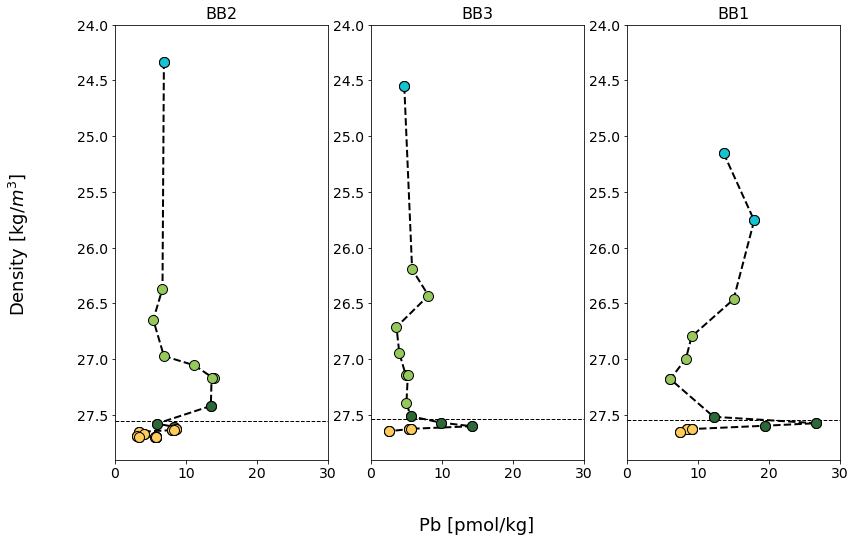

In [15]:
##Pb vs Density

fig, ax = plt.subplots(1,3, figsize=(13, 8))
ax[0].set_ylim(24, 27.9); ax[1].set_ylim(24, 27.9); ax[2].set_ylim(24, 27.9)
ax[0].set_xlim(0, 30); ax[1].set_xlim(0, 30); ax[2].set_xlim(0, 30)
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[2].tick_params(axis='both', which='major', labelsize=14)

ax[0].invert_yaxis(); ax[1].invert_yaxis(); ax[2].invert_yaxis()
ax[0].set_title('BB2', fontsize=16); ax[1].set_title('BB3', fontsize=16); ax[2].set_title('BB1', fontsize=16)

# Dashed line profiles:
# Horizontal lines:
ax[0].plot([0,30], [Den_bb2[452],Den_bb2[452]], '--k', linewidth=1) 
ax[1].plot([0,30], [Den_bb3[452],Den_bb3[452]], '--k', linewidth=1) 
ax[2].plot([0,30], [Den_bb1[453],Den_bb1[453]], '--k', linewidth=1) 
# Vertical lines:
ax[0].plot(dPb_BB2, densities_BB2, '--k', linewidth=2) 
ax[1].plot(dPb_BB3, densities_BB3, '--k', linewidth=2)
ax[2].plot(dPb_BB1, densities_BB1, '--k', linewidth=2)
ax[0].plot(dPb_BB2, densities_BB2, '.', c=colors[4], markersize=20, markeredgecolor='k') 
ax[1].plot(dPb_BB3, densities_BB3, '.', c=colors[4], markersize=20, markeredgecolor='k')       
ax[2].plot(dPb_BB1, densities_BB1, '.', c=colors[4], markersize=20, markeredgecolor='k')  

## Label water layers in density profiles:
# Surface waters:
ax[0].plot(dPb_BB2[densities_BB2 < 26], densities_BB2[densities_BB2 < 26], '.', \
           c=colors[1], markersize=20, markeredgecolor='k') 
ax[1].plot(dPb_BB3[densities_BB3 < 26], densities_BB3[densities_BB3 < 26], '.', \
           c=colors[1], markersize=20, markeredgecolor='k')       
ax[2].plot(dPb_BB1[densities_BB1 < 26], densities_BB1[densities_BB1 < 26], '.', \
           c=colors[1], markersize=20, markeredgecolor='k')
# WGIW:
ax[0].plot(dPb_BB2[densities_BB2 < 27.7][densities_BB2 > 27.4], \
           densities_BB2[densities_BB2 < 27.7][densities_BB2 > 27.4], '.', c=colors[5], markersize=20, markeredgecolor='k') 
ax[1].plot(dPb_BB3[densities_BB3 < 27.7][densities_BB3 > 27.4], \
           densities_BB3[densities_BB3 < 27.7][densities_BB3 > 27.4], '.', c=colors[5], markersize=20, markeredgecolor='k') 
ax[2].plot(dPb_BB1[densities_BB1 < 27.7][densities_BB1 > 27.4], \
           densities_BB1[densities_BB1 < 27.7][densities_BB1 > 27.4], '.', c=colors[5], markersize=20, markeredgecolor='k') 
# Bottom waters: 
ax[0].plot(dPb_BB2[densities_BB2 >= 27.61], densities_BB2[densities_BB2 >= 27.61], '.',\
           c=colors[3], markersize=20, markeredgecolor='k') 
ax[1].plot(dPb_BB3[densities_BB3 >= 27.61], densities_BB3[densities_BB3 >= 27.61], '.', \
           c=colors[3], markersize=20, markeredgecolor='k')       
ax[2].plot(dPb_BB1[densities_BB1 >= 27.61], densities_BB1[densities_BB1 >= 27.61], '.', \
           c=colors[3], markersize=20, markeredgecolor='k')


fig.text(0.45, 0.01, 'Pb [pmol/kg]', va='center', fontsize=18)
fig.text(0.01, 0.5, 'Density [kg/$m^3$]', va='center', rotation='vertical',fontsize=18)

fig.savefig('/ocean/brogalla/GEOTRACES/figures/IUGG_Pb-density.png', bbox_inches='tight', dpi=700)

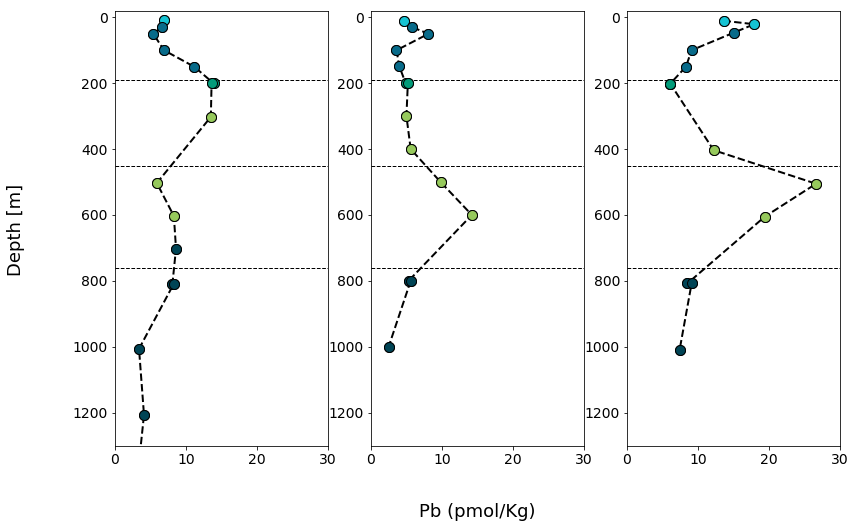

In [27]:
##Pb vs Density

fig, ax = plt.subplots(1,3, figsize=(13, 8))
ax[0].set_ylim(-20,1300); ax[1].set_ylim(-20,1300); ax[2].set_ylim(-20,1300)
ax[0].set_xlim(0, 30); ax[1].set_xlim(0, 30); ax[2].set_xlim(0, 30)
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[2].tick_params(axis='both', which='major', labelsize=14)

ax[0].invert_yaxis(); ax[1].invert_yaxis(); ax[2].invert_yaxis()
# ax[0].set_title('BB2', fontsize=16); ax[1].set_title('BB3', fontsize=16); ax[2].set_title('BB1', fontsize=16)

# # legend:
# ax[0].plot(-10, 0, '.', c=colors[1], markersize=20, label='Surface waters')
# ax[0].plot(-10, 0, '.', c=colors[2], markersize=20, label='Arctic waters')
# ax[0].plot(-10, 0, '.', c=colors[0], markersize=20, label='Coastal West Greenland current')
# ax[0].plot(-10, 0, '.', c=colors[4], markersize=20, label='West Greenland current')
# ax[0].plot(-10, 0, '.', c='#004455', markersize=20, label='Deep waters')

# ax[0].legend(frameon=False)

# Dashed line profiles:
# horizontal lines
ax[0].plot([0,30], [190,190], '--k', linewidth=1) 
ax[1].plot([0,30], [190,190], '--k', linewidth=1)
ax[2].plot([0,30], [190,190], '--k', linewidth=1)
ax[0].plot([0,30], [450,450], '--k', linewidth=1) 
ax[1].plot([0,30], [450,450], '--k', linewidth=1)
ax[2].plot([0,30], [450,450], '--k', linewidth=1)
ax[0].plot([0,30], [760,760], '--k', linewidth=1) 
ax[1].plot([0,30], [760,760], '--k', linewidth=1)
ax[2].plot([0,30], [760,760], '--k', linewidth=1)
# vertical lines
ax[0].plot(dPb_BB2, depth_BB2, '--k', linewidth=2) 
ax[1].plot(dPb_BB3, depth_BB3, '--k', linewidth=2)
ax[2].plot(dPb_BB1, depth_BB1, '--k', linewidth=2)
ax[0].plot(dPb_BB2, depth_BB2, '.', c=colors[4], markersize=20, markeredgecolor='k') 
ax[1].plot(dPb_BB3, depth_BB3, '.', c=colors[4], markersize=20, markeredgecolor='k')       
ax[2].plot(dPb_BB1, depth_BB1, '.', c=colors[4], markersize=20, markeredgecolor='k')  

## Label water layers in density profiles:
# Surface waters:
ax[0].plot(dPb_BB2[densities_BB2 < 26], depth_BB2[densities_BB2 < 26], '.', \
           c=colors[1], markersize=20, markeredgecolor='k') 
ax[1].plot(dPb_BB3[densities_BB3 < 26], depth_BB3[densities_BB3 < 26], '.', \
           c=colors[1], markersize=20, markeredgecolor='k')       
ax[2].plot(dPb_BB1[densities_BB1 < 26], depth_BB1[densities_BB1 < 26], '.', \
           c=colors[1], markersize=20, markeredgecolor='k')

# AW:
ax[0].plot(dPb_BB2[(densities_BB2 < 27.1) & (densities_BB2 >= 26.0)], \
           depth_BB2[(densities_BB2 < 27.1) & (densities_BB2 >= 26.0)], '.', c=colors[2], markersize=20, markeredgecolor='k') 
ax[1].plot(dPb_BB3[(densities_BB3 < 27.1) & (densities_BB3 >= 26.0)], \
           depth_BB3[(densities_BB3 < 27.1) & (densities_BB3 >= 26.0)], '.', c=colors[2], markersize=20, markeredgecolor='k') 
ax[2].plot(dPb_BB1[(densities_BB1 < 27.1) & (densities_BB1 >= 26.0)], \
           depth_BB1[(densities_BB1 < 27.1) & (densities_BB1 >= 26.0)], '.', c=colors[2], markersize=20, markeredgecolor='k') 

# TrW:
ax[0].plot(dPb_BB2[(densities_BB2 < 27.25) & (densities_BB2 >= 27.1)], \
           depth_BB2[(densities_BB2 < 27.25) & (densities_BB2 >= 27.1)], '.', c=colors[0], markersize=20, markeredgecolor='k') 
ax[1].plot(dPb_BB3[(densities_BB3 < 27.25) & (densities_BB3 >= 27.1)], \
           depth_BB3[(densities_BB3 < 27.25) & (densities_BB3 >= 27.1)], '.', c=colors[0], markersize=20, markeredgecolor='k') 
ax[2].plot(dPb_BB1[(densities_BB1 < 27.25) & (densities_BB1 >= 27.1)], \
           depth_BB1[(densities_BB1 < 27.25) & (densities_BB1 >= 27.1)], '.', c=colors[0], markersize=20, markeredgecolor='k') 

# WGIW:
ax[0].plot(dPb_BB2[(densities_BB2 < 27.61) & (densities_BB2 >= 27.25)], \
           depth_BB2[(densities_BB2 < 27.61) & (densities_BB2 >= 27.25)], '.', c=colors[4], markersize=20, markeredgecolor='k') 
ax[1].plot(dPb_BB3[(densities_BB3 < 27.61) & (densities_BB3 >= 27.25)], \
           depth_BB3[(densities_BB3 < 27.61) & (densities_BB3 >= 27.25)], '.', c=colors[4], markersize=20, markeredgecolor='k') 
ax[2].plot(dPb_BB1[(densities_BB1 < 27.61) & (densities_BB1 >= 27.25)], \
           depth_BB1[(densities_BB1 < 27.61) & (densities_BB1 >= 27.25)], '.', c=colors[4], markersize=20, markeredgecolor='k') 

# BBDW:
ax[0].plot(dPb_BB2[densities_BB2 >= 27.61], depth_BB2[densities_BB2 >= 27.61], '.',\
           c='#004455', markersize=20, markeredgecolor='k') 
ax[1].plot(dPb_BB3[densities_BB3 >= 27.61], depth_BB3[densities_BB3 >= 27.61], '.', \
           c='#004455', markersize=20, markeredgecolor='k')       
ax[2].plot(dPb_BB1[densities_BB1 >= 27.61], depth_BB1[densities_BB1 >= 27.61], '.', \
           c='#004455', markersize=20, markeredgecolor='k')

fig.text(0.45, 0.01, 'Pb (pmol/Kg)', va='center', fontsize=18)
fig.text(0.01, 0.5, 'Depth [m]', va='center', rotation='vertical',fontsize=18)

fig.savefig('/ocean/brogalla/GEOTRACES/figures/IUGG_Pb-depth.png', bbox_inches='tight', dpi=700)

Load particle tracks:

In [15]:
BB = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/paper_Manuel/trajec_2015-shift05.nc')
initx_BB = BB.variables['init_x']
inity_BB = BB.variables['init_y']
initz_BB = BB.variables['init_z']
lon_BB = BB.variables['traj_lon']
lat_BB = BB.variables['traj_lat']
depth_BB = BB.variables['traj_depth']
    
initx_BB = np.array(initx_BB)
inity_BB = np.array(inity_BB)
initz_BB = np.array(initz_BB)
lon_BB = np.array(lon_BB)   
lat_BB = np.array(lat_BB)
depth_BB = np.array(depth_BB)

In [16]:
stn = np.zeros(initx_BB.shape)
for i in range(0,len(initx_BB)):
    if np.abs(initx_BB[i]-560) < 10:
        stn[i] = 1
    elif np.abs(initx_BB[i]-570) < 10:
        stn[i] = 2
    else:
        stn[i] = 3

In [17]:
group_depth = np.zeros(initz_BB.shape)

for i in range(0,len(initz_BB)):
    if initz_BB[i] == 23: # (depth level in the model)
        group_depth[i] = 131 # (corresponding depth in meters)
    elif initz_BB[i] == 24:
        group_depth[i] = 156
    elif initz_BB[i] == 25:
        group_depth[i] = 186
    elif initz_BB[i] == 26:
        group_depth[i] = 222
    elif initz_BB[i] == 27:
        group_depth[i] = 266
    elif initz_BB[i] == 28:
        group_depth[i] = 318
    elif initz_BB[i] == 29:
        group_depth[i] = 380
    elif initz_BB[i] == 30:
        group_depth[i] = 454
    elif initz_BB[i] == 31:
        group_depth[i] = 541
    elif initz_BB[i] == 32:
        group_depth[i] = 643
    elif initz_BB[i] == 33:
        group_depth[i] = 763
    elif initz_BB[i] == 34:
        group_depth[i] = 902
    else:
        group_depth[i] = 0 # not a depth we are interested in

In [18]:
depth_classes = [186,222,266,318,380,454,541,643,763]

In [19]:
BB11 = [2,3,2,4,4,4,4,4,4]
BB12 = [5,6,1,6,4,2,2,5,4]
BB13 = [1,2,1,5,1,2,4,4,3]
BB14 = [4,1,5,6,5,4,4,5,4]
BB15 = [2,2,4,5,1,1,2,1,5]
BB16 = [2,4,1,1,4,4,1,4,4]
BB17 = [1,4,2,1,1,1,2,2,4]
BB18 = [2,1,3,4,4,2,4,4,4]
BB19 = [5,2,2,4,1,4,4,5,4]
BB1_class = np.ma.transpose(np.stack((BB11, BB12, BB13, BB14, BB15, BB16, BB17, BB18, BB19)))

BB21 = [4,1,1,4,1,4,4,4,4]
BB22 = [4,4,2,2,4,4,4,4,4]
BB23 = [4,2,3,2,1,1,4,4,4]
BB24 = [4,1,2,1,2,4,4,4,4]
BB25 = [4,4,2,4,2,4,4,4,4]
BB26 = [4,2,4,5,2,4,2,4,4]
BB27 = [4,5,4,4,1,4,4,4,4]
BB28 = [4,1,1,4,4,4,4,4,4]
BB29 = [4,4,1,1,1,1,4,4,4]
BB2_class = np.ma.transpose(np.stack((BB21, BB22, BB23, BB24, BB25, BB26, BB27, BB28, BB29)))

BB31 = [2,3,1,2,2,3,4,1,2] # each of these is the classifications of 1 position and 9 depth levels
BB32 = [2,3,1,2,1,4,5,1,4]
BB33 = [2,1,2,4,5,4,5,2,5]
BB34 = [3,3,2,4,4,3,5,5,2]
BB35 = [2,2,2,2,2,2,5,2,4]
BB36 = [1,1,1,1,2,5,2,2,2]
BB37 = [2,2,2,1,1,1,2,4,4]
BB38 = [2,1,2,2,1,4,1,4,4]
BB39 = [2,2,2,4,1,4,4,4,4]
# transpose matrix so that each of the rows is a depth level and each column is a position
BB3_class = np.ma.transpose(np.stack((BB31, BB32, BB33, BB34, BB35, BB36, BB37, BB38, BB39))) 

# Calculate the sum of the tracks in each of the categories for BB1:

BB1_class_sums = np.zeros((2,6)) 
for classi in range(1,7):
    b1=0
    for j in range(0, 5):
        a1 = sum([i == classi for i in BB1_class[j,:]])
        b1 += a1
    BB1_class_sums[0,classi-1] = b1
    
    b2 = 0
    for j in range(5, 9):
        a2 = sum([i == classi for i in BB1_class[j,:]])
        b2 += a2
    BB1_class_sums[1,classi-1] = b2
    
BB1_class_sums = BB1_class_sums.astype(int)

# Calculate the sum of the tracks in each of the categories for BB2:

BB2_class_sums = np.zeros((2,6)) 
for classi in range(1,7):
    b1=0
    for j in range(0, 5):
        a1 = sum([i == classi for i in BB2_class[j,:]])
        b1 += a1
    BB2_class_sums[0,classi-1] = b1
    
    b2 = 0
    for j in range(5, 9):
        a2 = sum([i == classi for i in BB2_class[j,:]])
        b2 += a2
    BB2_class_sums[1,classi-1] = b2
    
BB2_class_sums = BB2_class_sums.astype(int)

# Calculate the sum of the tracks in each of the categories for BB3:

BB3_class_sums = np.zeros((2,5)) 
for classi in range(1,6):
    b1=0
    for j in range(0, 5):
        a1 = sum([i == classi for i in BB3_class[j,:]])
        b1 += a1
    BB3_class_sums[0,classi-1] = b1
    
    b2 = 0
    for j in range(5, 9):
        a2 = sum([i == classi for i in BB3_class[j,:]])
        b2 += a2
    BB3_class_sums[1,classi-1] = b2
    
BB3_class_sums = BB3_class_sums.astype(int)

# Calculate proportions:
class1_BB1 = (BB1_class_sums[0,0]/45, BB1_class_sums[1,0]/36)
class1_BB2 = (BB2_class_sums[0,0]/45, BB2_class_sums[1,0]/36)
class1_BB3 = (BB3_class_sums[0,0]/45, BB3_class_sums[1,0]/36)
class2_BB1 = (BB1_class_sums[0,1]/45, BB1_class_sums[1,1]/36)
class2_BB2 = (BB2_class_sums[0,1]/45, BB2_class_sums[1,1]/36)
class2_BB3 = (BB3_class_sums[0,1]/45, BB3_class_sums[1,1]/36)
class3_BB1 = (BB1_class_sums[0,2]/45, BB1_class_sums[1,2]/36)
class3_BB2 = (BB2_class_sums[0,2]/45, BB2_class_sums[1,2]/36)
class3_BB3 = (BB3_class_sums[0,2]/45, BB3_class_sums[1,2]/36)
class4_BB1 = (BB1_class_sums[0,3]/45, BB1_class_sums[1,3]/36)
class4_BB2 = (BB2_class_sums[0,3]/45, BB2_class_sums[1,3]/36)
class4_BB3 = (BB3_class_sums[0,3]/45, BB3_class_sums[1,3]/36)
class5_BB1 = (BB1_class_sums[0,4]/45, BB1_class_sums[1,4]/36)
class5_BB2 = (BB2_class_sums[0,4]/45, BB2_class_sums[1,4]/36)
class5_BB3 = (BB3_class_sums[0,4]/45, BB3_class_sums[1,4]/36)
class6_BB1 = (BB1_class_sums[0,5]/45, BB1_class_sums[1,5]/36)

In [20]:
colors[2] = colors[1]

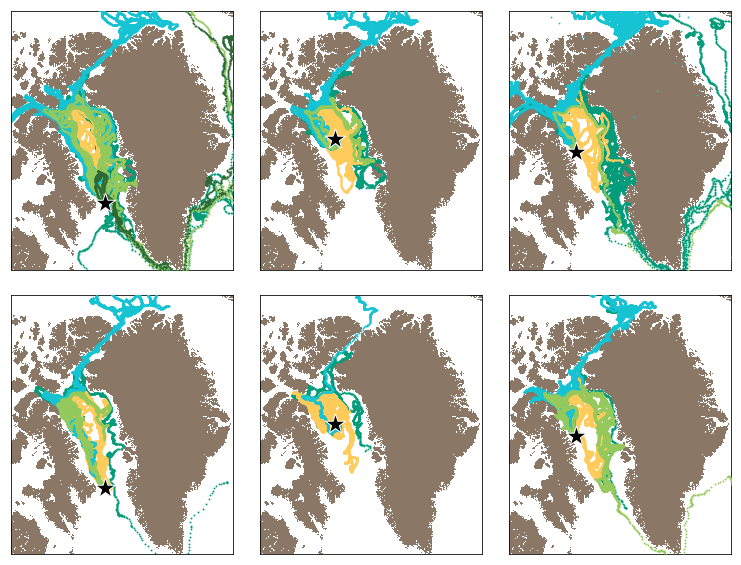

In [45]:
fig, ax = plt.subplots(2,3, figsize=(13,10))

zorders = [1, 3, 2, 2, 4, 5]

proj1=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='l', width=2.4e6, height=2.8e6, ax=ax[0, 0])
proj1.drawlsmask(land_color = "#8b7765",resolution = 'h')
proj2=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='l', width=2.4e6, height=2.8e6, ax=ax[0, 1])
proj2.drawlsmask(land_color = "#8b7765",resolution = 'h')
proj3=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='l', width=2.4e6, height=2.8e6, ax=ax[0, 2])
proj3.drawlsmask(land_color = "#8b7765",resolution = 'h')
proj4=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='l', width=2.4e6, height=2.8e6, ax=ax[1, 0])
proj4.drawlsmask(land_color = "#8b7765",resolution = 'h')
proj5=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='l', width=2.4e6, height=2.8e6, ax=ax[1, 1])
proj5.drawlsmask(land_color = "#8b7765",resolution = 'h')
proj6=Basemap(projection='eqdc',lat_0 = 73, lon_0 = -55, resolution='l', width=2.4e6, height=2.8e6, ax=ax[1, 2])
proj6.drawlsmask(land_color = "#8b7765",resolution = 'h')

i=0
for depth in depth_classes:
    lon1 = lon_BB[:, np.logical_and(group_depth == depth,stn == 1)]
    lat1 = lat_BB[:, np.logical_and(group_depth == depth,stn == 1)]
    lon2 = lon_BB[:, np.logical_and(group_depth == depth,stn == 2)]
    lat2 = lat_BB[:, np.logical_and(group_depth == depth,stn == 2)]
    lon3 = lon_BB[:, np.logical_and(group_depth == depth,stn == 3)]
    lat3 = lat_BB[:, np.logical_and(group_depth == depth,stn == 3)]
    
    for run in range(0,9): 
        lo1 = lon1[:,run]
        la1 = lat1[:,run]
        lo2 = lon2[:,run]
        la2 = lat2[:,run]
        lo3 = lon3[:,run]
        la3 = lat3[:,run]
        
        x1, y1 = proj1(lo1, la1)
        x2, y2 = proj1(lo2, la2)
        x3, y3 = proj1(lo3, la3)
        
        index_class1 = BB1_class[i,run]
        index_class2 = BB2_class[i,run]
        index_class3 = BB3_class[i,run]
        if i < 5:
            ax[0,0].scatter(x1, y1, zorder=zorders[index_class1-1], s=0.8, color=colors[index_class1-1])
            ax[0,1].scatter(x2, y2, zorder=zorders[index_class2-1], s=0.8, color=colors[index_class2-1])
            ax[0,2].scatter(x3, y3, zorder=zorders[index_class3-1], s=0.8, color=colors[index_class3-1])
        else:
            ax[1,0].scatter(x1, y1, zorder=zorders[index_class1-1], s=0.8, color=colors[index_class1-1])
            ax[1,1].scatter(x2, y2, zorder=zorders[index_class2-1], s=0.8, color=colors[index_class2-1])
            ax[1,2].scatter(x3, y3, zorder=zorders[index_class3-1], s=0.8, color=colors[index_class3-1])
    i+=1
    
x_BB1,y_BB1 = proj1(lon1[0,0],lat1[0,0])
x_BB2,y_BB2 = proj1(lon2[0,0],lat2[0,0])
x_BB3,y_BB3 = proj1(lon3[0,0],lat3[0,0])
ax[0,0].scatter(x_BB1, y_BB1, s=450, zorder=6, marker='*', c='k', edgecolors='w')
ax[1,0].scatter(x_BB1, y_BB1, s=450, zorder=6, marker='*', c='k', edgecolors='w')
ax[0,1].scatter(x_BB2, y_BB2, s=450, zorder=6, marker='*', c='k', edgecolors='w')
ax[1,1].scatter(x_BB2, y_BB2, s=450, zorder=6, marker='*', c='k', edgecolors='w')
ax[0,2].scatter(x_BB3, y_BB3, s=450, zorder=6, marker='*', c='k', edgecolors='w')
ax[1,2].scatter(x_BB3, y_BB3, s=450, zorder=6, marker='*', c='k', edgecolors='w')

plt.subplots_adjust(wspace=0.1, hspace=0.1)

fig.savefig('/ocean/brogalla/GEOTRACES/figures/IUGG_tracks.png', bbox_inches='tight', dpi=700)

Load bar plots:

Text(0.01, 0.5, 'Depth [m]')

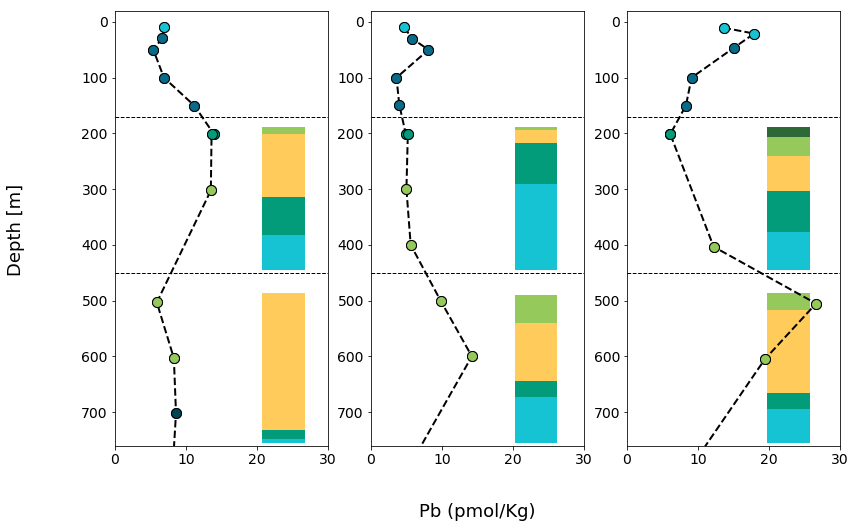

In [28]:
##Pb vs Density

fig, ax = plt.subplots(1,3, figsize=(13, 8))
ax[0].set_ylim(-20,760); ax[1].set_ylim(-20,760); ax[2].set_ylim(-20,760)
ax[0].set_xlim(0, 30); ax[1].set_xlim(0, 30); ax[2].set_xlim(0, 30)
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[2].tick_params(axis='both', which='major', labelsize=14)

ax[0].invert_yaxis(); ax[1].invert_yaxis(); ax[2].invert_yaxis()
# ax[0].set_title('BB2', fontsize=16); ax[1].set_title('BB3', fontsize=16); ax[2].set_title('BB1', fontsize=16)

# Dashed line profiles:
# horizontal lines
ax[0].plot([0,30], [450,450], '--k', linewidth=1) 
ax[1].plot([0,30], [450,450], '--k', linewidth=1)
ax[2].plot([0,30], [450,450], '--k', linewidth=1)
ax[0].plot([0,30], [170,170], '--k', linewidth=1) 
ax[1].plot([0,30], [170,170], '--k', linewidth=1)
ax[2].plot([0,30], [170,170], '--k', linewidth=1)
# vertical lines
ax[0].plot(dPb_BB2, depth_BB2, '--k', linewidth=2) 
ax[1].plot(dPb_BB3, depth_BB3, '--k', linewidth=2)
ax[2].plot(dPb_BB1, depth_BB1, '--k', linewidth=2)
ax[0].plot(dPb_BB2, depth_BB2, '.', c=colors[4], markersize=20, markeredgecolor='k') 
ax[1].plot(dPb_BB3, depth_BB3, '.', c=colors[4], markersize=20, markeredgecolor='k')       
ax[2].plot(dPb_BB1, depth_BB1, '.', c=colors[4], markersize=20, markeredgecolor='k')  

## Label water layers in density profiles:
# Surface waters:
ax[0].plot(dPb_BB2[densities_BB2 < 26], depth_BB2[densities_BB2 < 26], '.', \
           c=colors[1], markersize=20, markeredgecolor='k') 
ax[1].plot(dPb_BB3[densities_BB3 < 26], depth_BB3[densities_BB3 < 26], '.', \
           c=colors[1], markersize=20, markeredgecolor='k')       
ax[2].plot(dPb_BB1[densities_BB1 < 26], depth_BB1[densities_BB1 < 26], '.', \
           c=colors[1], markersize=20, markeredgecolor='k')

# AW:
ax[0].plot(dPb_BB2[(densities_BB2 < 27.1) & (densities_BB2 >= 26.0)], \
           depth_BB2[(densities_BB2 < 27.1) & (densities_BB2 >= 26.0)], '.', c=colors[2], markersize=20, markeredgecolor='k') 
ax[1].plot(dPb_BB3[(densities_BB3 < 27.1) & (densities_BB3 >= 26.0)], \
           depth_BB3[(densities_BB3 < 27.1) & (densities_BB3 >= 26.0)], '.', c=colors[2], markersize=20, markeredgecolor='k') 
ax[2].plot(dPb_BB1[(densities_BB1 < 27.1) & (densities_BB1 >= 26.0)], \
           depth_BB1[(densities_BB1 < 27.1) & (densities_BB1 >= 26.0)], '.', c=colors[2], markersize=20, markeredgecolor='k') 

# TrW:
ax[0].plot(dPb_BB2[(densities_BB2 < 27.25) & (densities_BB2 >= 27.1)], \
           depth_BB2[(densities_BB2 < 27.25) & (densities_BB2 >= 27.1)], '.', c=colors[0], markersize=20, markeredgecolor='k') 
ax[1].plot(dPb_BB3[(densities_BB3 < 27.25) & (densities_BB3 >= 27.1)], \
           depth_BB3[(densities_BB3 < 27.25) & (densities_BB3 >= 27.1)], '.', c=colors[0], markersize=20, markeredgecolor='k') 
ax[2].plot(dPb_BB1[(densities_BB1 < 27.25) & (densities_BB1 >= 27.1)], \
           depth_BB1[(densities_BB1 < 27.25) & (densities_BB1 >= 27.1)], '.', c=colors[0], markersize=20, markeredgecolor='k') 

# WGIW:
ax[0].plot(dPb_BB2[(densities_BB2 < 27.61) & (densities_BB2 >= 27.25)], \
           depth_BB2[(densities_BB2 < 27.61) & (densities_BB2 >= 27.25)], '.', c=colors[4], markersize=20, markeredgecolor='k') 
ax[1].plot(dPb_BB3[(densities_BB3 < 27.61) & (densities_BB3 >= 27.25)], \
           depth_BB3[(densities_BB3 < 27.61) & (densities_BB3 >= 27.25)], '.', c=colors[4], markersize=20, markeredgecolor='k') 
ax[2].plot(dPb_BB1[(densities_BB1 < 27.61) & (densities_BB1 >= 27.25)], \
           depth_BB1[(densities_BB1 < 27.61) & (densities_BB1 >= 27.25)], '.', c=colors[4], markersize=20, markeredgecolor='k') 

# BBDW:
ax[0].plot(dPb_BB2[densities_BB2 >= 27.61], depth_BB2[densities_BB2 >= 27.61], '.',\
           c='#004455', markersize=20, markeredgecolor='k') 
ax[1].plot(dPb_BB3[densities_BB3 >= 27.61], depth_BB3[densities_BB3 >= 27.61], '.', \
           c='#004455', markersize=20, markeredgecolor='k')       
ax[2].plot(dPb_BB1[densities_BB1 >= 27.61], depth_BB1[densities_BB1 >= 27.61], '.', \
           c='#004455', markersize=20, markeredgecolor='k')

# Little inset barplots:
N1 = 1
N3 = 1
ind1 = np.arange(N1) 
ind3 = np.arange(N3) 
width = 1
#BB2:
ax1  = fig.add_axes([0.28, 0.13, 0.05, 0.26])
ax1.axis('off')
ax12 = fig.add_axes([0.28, 0.43, 0.05, 0.26])
ax12.axis('off')
ax1.bar(ind1, class2_BB2[1], width, color=colors[1])
ax1.bar(ind1, class3_BB2[1], width, bottom=class2_BB2[1], color=colors[1])
ax1.bar(ind1, class1_BB2[1], width, bottom=np.add(class2_BB2[1], class3_BB2[1]), color=colors[0])
ax1.bar(ind1, class4_BB2[1], width, bottom=np.add(np.add(class3_BB2[1], class2_BB2[1]),class1_BB2[1]), color=colors[3])
ax1.bar(ind1, class5_BB2[1], width, bottom=np.add(np.add(np.add(class4_BB2[1], class2_BB2[1]), \
                                                             class1_BB2[1]), class3_BB2[1]), color=colors[4])
ax12.bar(ind1, class2_BB2[0], width, color=colors[1])
ax12.bar(ind1, class3_BB2[0], width, bottom=class2_BB2[0], color=colors[1])
ax12.bar(ind1, class1_BB2[0], width, bottom=np.add(class2_BB2[0], class3_BB2[0]), color=colors[0])
ax12.bar(ind1, class4_BB2[0], width, bottom=np.add(np.add(class3_BB2[0], class2_BB2[0]),class1_BB2[0]), color=colors[3])
ax12.bar(ind1, class5_BB2[0], width, bottom=np.add(np.add(np.add(class4_BB2[0], class2_BB2[0]), \
                                                             class1_BB2[0]), class3_BB2[0]), color=colors[4])

#BB3:
ax2 = fig.add_axes([0.55, 0.13, 0.05, 0.27])
ax2.axis('off')
ax22 = fig.add_axes([0.55, 0.43, 0.05, 0.26])
ax22.axis('off')
ax2.bar(ind1, class2_BB3[1], width, color=colors[1])
ax2.bar(ind1, class3_BB3[1], width, bottom=class2_BB3[1], color=colors[1])
ax2.bar(ind1, class1_BB3[1], width, bottom=np.add(class2_BB3[1], class3_BB3[1]), color=colors[0])
ax2.bar(ind1, class4_BB3[1], width, bottom=np.add(np.add(class3_BB3[1], class2_BB3[1]), class1_BB3[1]), color=colors[3])
ax2.bar(ind1, class5_BB3[1], width, bottom=np.add(np.add(np.add(class4_BB3[1], class2_BB3[1]), \
                                                              class1_BB3[1]), class3_BB3[1]), color=colors[4])
ax22.bar(ind1, class2_BB3[0], width, color=colors[1])
ax22.bar(ind1, class3_BB3[0], width, bottom=class2_BB3[0], color=colors[1])
ax22.bar(ind1, class1_BB3[0], width, bottom=np.add(class2_BB3[0], class3_BB3[0]), color=colors[0])
ax22.bar(ind1, class4_BB3[0], width, bottom=np.add(np.add(class3_BB3[0], class2_BB3[0]), class1_BB3[0]), color=colors[3])
ax22.bar(ind1, class5_BB3[0], width, bottom=np.add(np.add(np.add(class4_BB3[0], class2_BB3[0]), \
                                                              class1_BB3[0]), class3_BB3[0]), color=colors[4])


#BB1:
ax3 = fig.add_axes([0.82, 0.13, 0.05, 0.26])
ax3.axis('off')
ax32 = fig.add_axes([0.82, 0.43, 0.05, 0.26])
ax32.axis('off')
ax3.bar(ind1, class2_BB1[1], width, color=colors[1])
ax3.bar(ind1, class3_BB1[1], width, bottom=class2_BB1[1], color=colors[1])
ax3.bar(ind1, class1_BB1[1], width, bottom=np.add(class2_BB1[1], class3_BB1[1]), color=colors[0])
ax3.bar(ind1, class4_BB1[1], width, bottom=np.add(np.add(class3_BB1[1], class2_BB1[1]),class1_BB1[1]), color=colors[3])
ax3.bar(ind1, class5_BB1[1], width, bottom=np.add(np.add(np.add(class4_BB1[1], class2_BB1[1]), \
                                                             class1_BB1[1]), class3_BB1[1]), color=colors[4])
ax3.bar(ind1, class6_BB1[1], width, bottom=np.add(np.add(np.add(np.add(class4_BB1[1], class2_BB1[1]), \
                                                                    class1_BB1[1]), class3_BB1[1]), class5_BB1[1]),\
             color=colors[5])
ax32.bar(ind1, class2_BB1[0], width, color=colors[1])
ax32.bar(ind1, class3_BB1[0], width, bottom=class2_BB1[0], color=colors[1])
ax32.bar(ind1, class1_BB1[0], width, bottom=np.add(class2_BB1[0], class3_BB1[0]), color=colors[0])
ax32.bar(ind1, class4_BB1[0], width, bottom=np.add(np.add(class3_BB1[0], class2_BB1[0]),class1_BB1[0]), color=colors[3])
ax32.bar(ind1, class5_BB1[0], width, bottom=np.add(np.add(np.add(class4_BB1[0], class2_BB1[0]), \
                                                             class1_BB1[0]), class3_BB1[0]), color=colors[4])
ax32.bar(ind1, class6_BB1[0], width, bottom=np.add(np.add(np.add(np.add(class4_BB1[0], class2_BB1[0]), \
                                                                    class1_BB1[0]), class3_BB1[0]), class5_BB1[0]),\
             color=colors[5])

ax3.set_zorder(ax[2].get_zorder() - 1)
ax[2].patch.set_alpha(0.0)

fig.text(0.45, 0.01, 'Pb (pmol/Kg)', va='center', fontsize=18)
fig.text(0.01, 0.5, 'Depth [m]', va='center', rotation='vertical',fontsize=18)

# Summary figure:

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(13, 8))
ax[0].set_ylim(170,760); ax[1].set_ylim(170,760); ax[2].set_ylim(170,760)
ax[0].set_xlim(0, 30); ax[1].set_xlim(0, 30); ax[2].set_xlim(0, 30)
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[2].tick_params(axis='both', which='major', labelsize=14)

ax[0].invert_yaxis(); ax[1].invert_yaxis(); ax[2].invert_yaxis()
# ax[0].set_title('BB2', fontsize=16); ax[1].set_title('BB3', fontsize=16); ax[2].set_title('BB1', fontsize=16)

# Dashed line profiles:
# horizontal lines
ax[0].plot([0,30], [450,450], '--k', linewidth=1) 
ax[1].plot([0,30], [450,450], '--k', linewidth=1)
ax[2].plot([0,30], [450,450], '--k', linewidth=1)
# vertical lines
ax[0].plot(dPb_BB2, depth_BB2, '--k', linewidth=2) 
ax[1].plot(dPb_BB3, depth_BB3, '--k', linewidth=2)
ax[2].plot(dPb_BB1, depth_BB1, '--k', linewidth=2)
ax[0].plot(dPb_BB2, depth_BB2, '.', c='k', markersize=20, markeredgecolor='k') 
ax[1].plot(dPb_BB3, depth_BB3, '.', c='k', markersize=20, markeredgecolor='k')       
ax[2].plot(dPb_BB1, depth_BB1, '.', c='k', markersize=20, markeredgecolor='k')  


# Little inset barplots:
N1 = 1
N3 = 1
ind1 = np.arange(N1) 
ind3 = np.arange(N3) 
width = 1
#BB2:
ax1  = fig.add_axes([0.295, 0.13, 0.05, 0.35])
ax1.axis('off')
ax12 = fig.add_axes([0.295, 0.54, 0.05, 0.35])
ax12.axis('off')
ax1.bar(ind1, class2_BB2[1], width, color=colors[1])
ax1.bar(ind1, class3_BB2[1], width, bottom=class2_BB2[1], color=colors[1])
ax1.bar(ind1, class1_BB2[1], width, bottom=np.add(class2_BB2[1], class3_BB2[1]), color=colors[0])
ax1.bar(ind1, class4_BB2[1], width, bottom=np.add(np.add(class3_BB2[1], class2_BB2[1]),class1_BB2[1]), color=colors[3])
ax1.bar(ind1, class5_BB2[1], width, bottom=np.add(np.add(np.add(class4_BB2[1], class2_BB2[1]), \
                                                             class1_BB2[1]), class3_BB2[1]), color=colors[4])
ax12.bar(ind1, class2_BB2[0], width, color=colors[1])
ax12.bar(ind1, class3_BB2[0], width, bottom=class2_BB2[0], color=colors[1])
ax12.bar(ind1, class1_BB2[0], width, bottom=np.add(class2_BB2[0], class3_BB2[0]), color=colors[0])
ax12.bar(ind1, class4_BB2[0], width, bottom=np.add(np.add(class3_BB2[0], class2_BB2[0]),class1_BB2[0]), color=colors[3])
ax12.bar(ind1, class5_BB2[0], width, bottom=np.add(np.add(np.add(class4_BB2[0], class2_BB2[0]), \
                                                             class1_BB2[0]), class3_BB2[0]), color=colors[4])

#BB3:
ax2 = fig.add_axes([0.57, 0.13, 0.05, 0.37])
ax2.axis('off')
ax22 = fig.add_axes([0.57, 0.54, 0.05, 0.35])
ax22.axis('off')
ax2.bar(ind1, class2_BB3[1], width, color=colors[1])
ax2.bar(ind1, class3_BB3[1], width, bottom=class2_BB3[1], color=colors[1])
ax2.bar(ind1, class1_BB3[1], width, bottom=np.add(class2_BB3[1], class3_BB3[1]), color=colors[0])
ax2.bar(ind1, class4_BB3[1], width, bottom=np.add(np.add(class3_BB3[1], class2_BB3[1]), class1_BB3[1]), color=colors[3])
ax2.bar(ind1, class5_BB3[1], width, bottom=np.add(np.add(np.add(class4_BB3[1], class2_BB3[1]), \
                                                              class1_BB3[1]), class3_BB3[1]), color=colors[4])
ax22.bar(ind1, class2_BB3[0], width, color=colors[1])
ax22.bar(ind1, class3_BB3[0], width, bottom=class2_BB3[0], color=colors[1])
ax22.bar(ind1, class1_BB3[0], width, bottom=np.add(class2_BB3[0], class3_BB3[0]), color=colors[0])
ax22.bar(ind1, class4_BB3[0], width, bottom=np.add(np.add(class3_BB3[0], class2_BB3[0]), class1_BB3[0]), color=colors[3])
ax22.bar(ind1, class5_BB3[0], width, bottom=np.add(np.add(np.add(class4_BB3[0], class2_BB3[0]), \
                                                              class1_BB3[0]), class3_BB3[0]), color=colors[4])


#BB1:
ax3 = fig.add_axes([0.845, 0.13, 0.05, 0.35])
ax3.axis('off')
ax32 = fig.add_axes([0.845, 0.54, 0.05, 0.35])
ax32.axis('off')
ax3.bar(ind1, class2_BB1[1], width, color=colors[1])
ax3.bar(ind1, class3_BB1[1], width, bottom=class2_BB1[1], color=colors[1])
ax3.bar(ind1, class1_BB1[1], width, bottom=np.add(class2_BB1[1], class3_BB1[1]), color=colors[0])
ax3.bar(ind1, class4_BB1[1], width, bottom=np.add(np.add(class3_BB1[1], class2_BB1[1]),class1_BB1[1]), color=colors[3])
ax3.bar(ind1, class5_BB1[1], width, bottom=np.add(np.add(np.add(class4_BB1[1], class2_BB1[1]), \
                                                             class1_BB1[1]), class3_BB1[1]), color=colors[4])
ax3.bar(ind1, class6_BB1[1], width, bottom=np.add(np.add(np.add(np.add(class4_BB1[1], class2_BB1[1]), \
                                                                    class1_BB1[1]), class3_BB1[1]), class5_BB1[1]),\
             color=colors[5])
ax32.bar(ind1, class2_BB1[0], width, color=colors[1])
ax32.bar(ind1, class3_BB1[0], width, bottom=class2_BB1[0], color=colors[1])
ax32.bar(ind1, class1_BB1[0], width, bottom=np.add(class2_BB1[0], class3_BB1[0]), color=colors[0])
ax32.bar(ind1, class4_BB1[0], width, bottom=np.add(np.add(class3_BB1[0], class2_BB1[0]),class1_BB1[0]), color=colors[3])
ax32.bar(ind1, class5_BB1[0], width, bottom=np.add(np.add(np.add(class4_BB1[0], class2_BB1[0]), \
                                                             class1_BB1[0]), class3_BB1[0]), color=colors[4])
ax32.bar(ind1, class6_BB1[0], width, bottom=np.add(np.add(np.add(np.add(class4_BB1[0], class2_BB1[0]), \
                                                                    class1_BB1[0]), class3_BB1[0]), class5_BB1[0]),\
             color=colors[5])

ax3.set_zorder(ax[2].get_zorder() - 1)
ax[2].patch.set_alpha(0.0)

fig.text(0.45, 0.01, 'Pb [pmol/kg]', va='center', fontsize=18)
fig.text(0.01, 0.5, 'Depth [m]', va='center', rotation='vertical',fontsize=18)
fig.savefig('/ocean/brogalla/GEOTRACES/figures/IUGG_summary.png', bbox_inches='tight', dpi=700)

Upper layer:

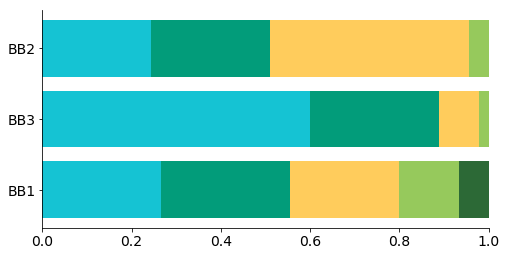

In [55]:
fig, ax1 = plt.subplots(1,1,figsize=(8,4))
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.set_yticklabels(['BB2', 'BB3', 'BB1'])
ax1.set_yticks([3, 2, 1])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlim([0, 1.0])
width = 0.8

#BB2 bar plot:
BB2  = [class2_BB2[0], class3_BB2[0], class1_BB2[0], class4_BB2[0], class5_BB2[0]]
cols = [colors[1], colors[1], colors[0], colors[3], colors[4], colors[5]]
lefts = 0
for i in range(0,len(BB2)):
    ax1.barh(3, BB2[i], width, left=lefts, color=cols[i])
    lefts = lefts + BB2[i]

#BB3 bar plot:
BB3  = [class2_BB3[0], class3_BB3[0], class1_BB3[0], class4_BB3[0], class5_BB3[0]]
cols = [colors[1], colors[1], colors[0], colors[3], colors[4]]
lefts = 0
for i in range(0,len(BB3)):
    ax1.barh(2, BB3[i], width, left=lefts, color=cols[i])
    lefts = lefts + BB3[i]

#BB1 bar plot:
BB1  = [class2_BB1[0], class3_BB1[0], class1_BB1[0], class4_BB1[0], class5_BB1[0], class6_BB1[0]]
cols = [colors[1], colors[1], colors[0], colors[3], colors[4], colors[5]]
lefts = 0
for i in range(0,len(BB1)):
    ax1.barh(1, BB1[i], width, left=lefts, color=cols[i])
    lefts = lefts + BB1[i]
    
fig.savefig('/ocean/brogalla/GEOTRACES/figures/IUGG_prop_upper.png', bbox_inches='tight', dpi=700)

Lower layer:

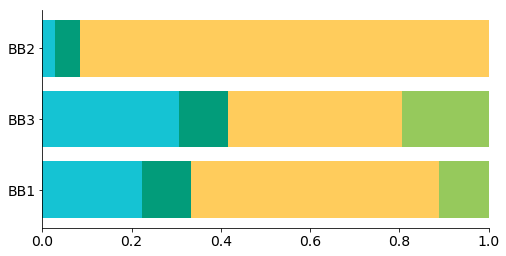

In [56]:
fig, ax1 = plt.subplots(1,1,figsize=(8,4))
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.set_yticklabels(['BB2', 'BB3', 'BB1'])
ax1.set_yticks([3, 2, 1])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
width = 0.8

#BB2 bar plot:
BB2  = [class2_BB2[1], class3_BB2[1], class1_BB2[1], class4_BB2[1], class5_BB2[1]]
cols = [colors[1], colors[1], colors[0], colors[3], colors[4], colors[5]]
lefts = 0
for i in range(0,len(BB2)):
    ax1.barh(3, BB2[i], width, left=lefts, color=cols[i])
    lefts = lefts + BB2[i]

#BB3 bar plot:
BB3  = [class2_BB3[1], class3_BB3[1], class1_BB3[1], class4_BB3[1], class5_BB3[1]]
cols = [colors[1], colors[1], colors[0], colors[3], colors[4]]
lefts = 0
for i in range(0,len(BB3)):
    ax1.barh(2, BB3[i], width, left=lefts, color=cols[i])
    lefts = lefts + BB3[i]

#BB1 bar plot:
BB1  = [class2_BB1[1], class3_BB1[1], class1_BB1[1], class4_BB1[1], class5_BB1[1], class6_BB1[1]]
cols = [colors[1], colors[1], colors[0], colors[3], colors[4], colors[5]]
lefts = 0
for i in range(0,len(BB1)):
    ax1.barh(1, BB1[i], width, left=lefts, color=cols[i])
    lefts = lefts + BB1[i]
    
fig.savefig('/ocean/brogalla/GEOTRACES/figures/IUGG_prop_lower.png', bbox_inches='tight', dpi=700)